## <font color=green><b>Website Analysis</b></font> 

### Business Understanding

The objective of this analysis is to provide insights into the performance of the Kitaru website by analyzing visitor behavior. Key focus areas include identifying new versus returning visitors, understanding the most effective referral sources, and determining the geographical distribution of the website’s audience.

### Data Understanding

The dataset includes metrics such as visitor types (new vs. returning), referral sources (Referrals, Search Engine, Social Media), monthly visitor counts, the most visited pages, and the geographical distribution of visitors. The data captures visitor behavior and engagement over a specified period.

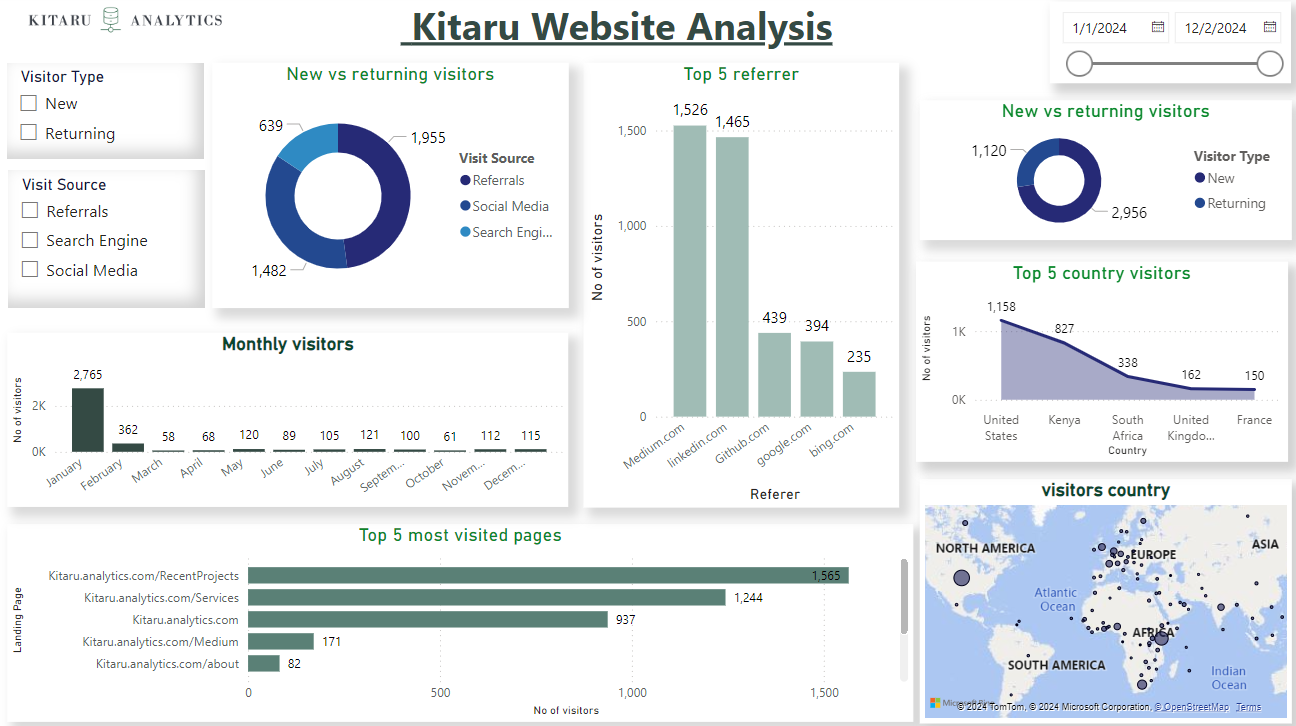

In [21]:
from IPython.display import Image

# Display the image
Image(filename='Kitaru-img.png', width=800, height=400)


In [44]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
#loading data
df = pd.read_csv(r'Website_traffic.csv')
df.head()

,City,Continent,Country,Visitor Type,Last,Time Spent on Website,Number of Visits,Number of Pages Accessed,Visit Source,Referer,Original,Landing Page,Browser (Last Visit),OS (Last Visit)
0,Mangalore,Asia,India,New,1/1/2024,07 mins 01 secs,1,20,Referrals,Medium.com,Kitaru.analytics.com,https://www.Kitaru.analytics,Google Chrome,Microsoft Windows
1,Kampala,Africa,Uganda,New,1/1/2024,01 mins 33 secs,1,1,Referrals,Medium.com,Kitaru.analytics.com/Services,https://www.Kitaru.analytics.com/Services,Google Chrome,Android
2,Bulawayo,Africa,Zimbabwe,New,1/1/2024,01 hrs 27 mins,1,1,Referrals,Medium.com,Kitaru.analytics.com/RecentProjects,https://www.Kitaru.analytics.com/RecentProjects,Microsoft Edge,Microsoft Windows
3,Hamilton,North America,Canada,New,1/1/2024,24 mins 16 secs,1,4,Referrals,Medium.com,Kitaru.analytics.com,https://www.Kitaru.analytics.com,Google Chrome,Android
4,Kampala,Africa,Uganda,New,1/1/2024,01 mins 03 secs,1,1,Referrals,Medium.com,Kitaru.analytics.com/Services,https://www.Kitaru.analytics.com/Services,Apple Safari,unknown


In [57]:
# Listing columns in the dataset.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   City                      4076 non-null   object
 1   Continent                 4076 non-null   object
 2   Country                   4076 non-null   object
 3   Visitor Type              4076 non-null   object
 4   Last                      4076 non-null   object
 5   Time Spent on Website     4076 non-null   object
 6   Number of Visits          4076 non-null   int64 
 7   Number of Pages Accessed  4076 non-null   int64 
 8   Visit Source              4076 non-null   object
 9   Referer                   4076 non-null   object
 10  Original                  4076 non-null   object
 11  Landing Page              4076 non-null   object
 12  Browser (Last Visit)      4076 non-null   object
 13  OS (Last Visit)           4076 non-null   object
dtypes: int64(2), object(12)


In [58]:
# number of rows and columns
rows, colums = df.shape
print(f'No of rows in the dataset is {rows}')
print(f'No of columns in the dataset is {colums}')

No of rows in the dataset is 4076
No of columns in the dataset is 14


In [59]:
#deleting unnecessary columns
df.drop(columns={'OS (Last Visit)','Browser (Last Visit)','Original','Number of Pages Accessed','Time Spent on Website'},inplace=True)

In [60]:
#checking dataset after renaming column
df.sample(n=5)

,City,Continent,Country,Visitor Type,Last,Number of Visits,Visit Source,Referer,Landing Page
1968,Amsterdam,Europe,Netherlands,New,23/01/2024,1,Social Media,linkedin.com,https://www.Kitaru.analytics.com/RecentProjects
3115,The Hague,Europe,Netherlands,Returning,26/01/2024,2,Search Engine,google.com,https://www.Kitaru.analytics.com/RecentProjects
2238,Hutten Heights,Africa,South Africa,New,24/01/2024,1,Referrals,Medium.com,https://www.Kitaru.analytics.com/Services
3146,Hatfield,Africa,South Africa,New,26/01/2024,1,Search Engine,google.com,https://www.Kitaru.analytics.com/Services
1406,Coronado,North America,United States,New,15/02/2024,1,Referrals,Medium.com,https://www.Kitaru.analytics.com


In [61]:
# Removing 'https://www.' from the 'Landing Page'and the 'referrer' column

df[['Landing Page']] = df[['Landing Page']].apply(lambda col: col.str.replace('https://www.', '', regex=False))

#Inspecting random rows using sample method to check for effect.
df.head()

,City,Continent,Country,Visitor Type,Last,Number of Visits,Visit Source,Referer,Landing Page
0,Mangalore,Asia,India,New,1/1/2024,1,Referrals,Medium.com,Kitaru.analytics
1,Kampala,Africa,Uganda,New,1/1/2024,1,Referrals,Medium.com,Kitaru.analytics.com/Services
2,Bulawayo,Africa,Zimbabwe,New,1/1/2024,1,Referrals,Medium.com,Kitaru.analytics.com/RecentProjects
3,Hamilton,North America,Canada,New,1/1/2024,1,Referrals,Medium.com,Kitaru.analytics.com
4,Kampala,Africa,Uganda,New,1/1/2024,1,Referrals,Medium.com,Kitaru.analytics.com/Services


In [62]:
#renaming the date column
df.rename(columns={'Last':'Date'},inplace=True)
df.sample(n=5)

,City,Continent,Country,Visitor Type,Date,Number of Visits,Visit Source,Referer,Landing Page
3709,Des Moines,North America,United States,New,31/01/2024,1,Social Media,linkedin.com,Kitaru.analytics.com/RecentProjects
2400,Oberwil Bei Zug,Europe,Switzerland,New,24/01/2024,1,Search Engine,google.com,Kitaru.analytics.com/RecentProjects
231,Johannesburg,Africa,South Africa,New,3/1/2024,1,Referrals,Medium.com,Kitaru.analytics.com/Services
2319,Cotonou,Africa,Benin,New,24/01/2024,1,Referrals,Medium.com,Kitaru.analytics.com/Services
2391,Bangalore,Asia,India,New,24/01/2024,1,Search Engine,google.com,Kitaru.analytics.com/Services


In [66]:
#Convert 'Date' column to datetime format during DataFrame creation
df['Date']=pd.to_datetime(df['Date'])

In [69]:
# # Extract month name into a new column 'Month'

df['Month'] = df['Date'].dt.strftime('%B')
df.sample(n=5)

,City,Continent,Country,Visitor Type,Date,Number of Visits,Visit Source,Referer,Landing Page,Month
96,Madinah Shrbyn,Africa,Egypt,Returning,2024-01-02,2,Referrals,Medium.com,Kitaru.analytics.com/RecentProjects,January
3118,Paris,Europe,France,New,2024-01-26,1,Social Media,linkedin.com,Kitaru.analytics.com/RecentProjects,January
142,Nairobi,Africa,Kenya,Returning,2024-02-01,3,Referrals,Medium.com,Kitaru.analytics.com/Services,February
1295,Nairobi,Africa,Kenya,Returning,2024-02-14,3,Referrals,Medium.com,Kitaru.analytics.com,February
1297,Vienna,Europe,Austria,New,2024-02-14,1,Referrals,Medium.com,Kitaru.analytics.com/RecentProjects,February
3271,Nsawam,Africa,Ghana,New,2024-01-28,1,Social Media,linkedin.com,Kitaru.analytics.com/RecentProjects,January
693,San Francisco,North America,United States,Returning,2024-08-02,2,Referrals,Medium.com,Kitaru.analytics.com,August
2791,Quebec,North America,Canada,New,2024-01-26,1,Referrals,Github.com,Kitaru.analytics.com/RecentProjects,January
1743,Accra,Africa,Ghana,New,2024-01-19,1,Referrals,Medium.com,Kitaru.analytics.com/Services,January
3218,Lyon,Europe,France,New,2024-01-27,1,Social Media,linkedin.com,Kitaru.analytics.com/RecentProjects,January


In [86]:
#analysisng the monst visisted pages.
Most_visited_pages = df['Landing Page'].value_counts()
Most_visited_pages

Kitaru.analytics.com/RecentProjects    1565
Kitaru.analytics.com/Services          1244
Kitaru.analytics.com                    937
Kitaru.analytics.com/Medium             171
Kitaru.analytics.com/about               82
Kitaru.analytics.com/contact             53
Kitaru.analytics.com/FAQ                 23
Kitaru.analytics                          1
Name: Landing Page, dtype: int64

In [88]:
#analysisng the monst visisted pages.
Source_count = df['Visit Source'].value_counts()
Source_count

Referrals        1955
Social Media     1482
Search Engine     639
Name: Visit Source, dtype: int64

In [93]:
#analysing referers.
Referer_count = df['Referer'].value_counts()
Referer_count

Medium.com      1526
linkedin.com    1465
Github.com       439
google.com       394
bing.com         235
Youtube.com       17
Name: Referer, dtype: int64

In [74]:
#populating the number of new and returning visitors for plotting.
visitor_counts = df['Visitor Type'].value_counts()
visitor_counts 


New          2956
Returning    1120
Name: Visitor Type, dtype: int64

In [98]:
#Creating a copy for powerBI visualization.
cleaned_df = df
cleaned_df .head()

,City,Continent,Country,Visitor Type,Date,Number of Visits,Visit Source,Referer,Landing Page,Month
0,Mangalore,Asia,India,New,2024-01-01,1,Referrals,Medium.com,Kitaru.analytics,January
1,Kampala,Africa,Uganda,New,2024-01-01,1,Referrals,Medium.com,Kitaru.analytics.com/Services,January
2,Bulawayo,Africa,Zimbabwe,New,2024-01-01,1,Referrals,Medium.com,Kitaru.analytics.com/RecentProjects,January
3,Hamilton,North America,Canada,New,2024-01-01,1,Referrals,Medium.com,Kitaru.analytics.com,January
4,Kampala,Africa,Uganda,New,2024-01-01,1,Referrals,Medium.com,Kitaru.analytics.com/Services,January


In [101]:
#saving the cleaned dataset for powerBI vizualization.
cleaned_df.to_csv(r"C:\Website_traffic\1.Working_data\website_analysed_traffic.csv",index=False)

---------------------------------------------------------------------------------------------------------------------------------------------